## Capture-Mark-Recapture model in PyMC3

Lets say the population size (which is normally unknown) is 1000 individuals. We will capture and mark 50 the first visit, so now 50/1000 or 5% are marked. The next visit another 200 individuals are captured, so we would expect to catch 5% marked ones or 10. 

Now without the population size it is rather easy to estimate it from 50 marked indivuals, and 10 recaptured out of 200. The percentage of recaptured individuals, here 5%, indicates that on the fist visit 5% of the entire population was marked. So if 50 is 5%, 1000 is 100% rather simple math from primary school really. The harder part is to estimate the uncertainty as when recapturing you could easily capture 4 or 6 marked individuals. There are more complicated formulas to do this, but using a probabilisic approach we won't need them!

So we have an unknown population_size, which is a flat distribution where only a lower bound can be set, a probability (p_marked) of recapturing a marked individual, the number of marked individual divided by the population size. An our observation of 2 recaptured individuals with a binomial likelihood of drawing 200 times with a probability for success of p_marked.

In [1]:
%load_ext nb_black
import pymc3 as pm
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<IPython.core.display.Javascript object>

In [2]:
n_marked = 25
captured_round_2 = 125
n_recaptured = 6

with pm.Model() as model:
    population_size = pm.Bound(
        pm.Flat, lower=n_marked + captured_round_2 - n_recaptured
    )("population_size")
    p_marked = pm.Deterministic("p_marked", n_marked / population_size)

    recapture_obs = pm.Binomial(
        "recapture_obs", captured_round_2, p_marked, observed=n_recaptured
    )

    trace = pm.sample(4000, tune=1000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [population_size]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 14 seconds.
The acceptance probability does not match the target. It is 0.7061872032999474, but should be close to 0.8. Try to increase the number of tuning steps.


<IPython.core.display.Javascript object>

<Figure size 700x700 with 0 Axes>

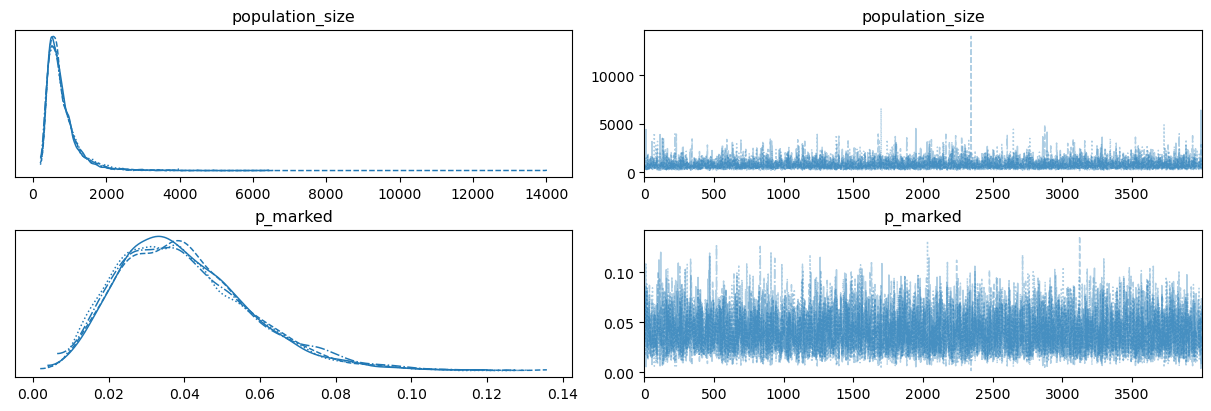

<IPython.core.display.Javascript object>

In [3]:
with model:
    plt.figure(figsize=(7, 7))
    pm.plot_trace(trace)
    plt.show()

In [4]:
with model:
    stats_df = pm.summary(trace)
stats_df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
population_size,777.853,449.232,247.752,1529.491,5.04,3.564,7061.0,10637.0,1.0
p_marked,0.040,0.018,0.010,0.072,0.00,0.000,7061.0,10637.0,1.0


<IPython.core.display.Javascript object>